<a href="https://colab.research.google.com/github/1900690/heatmap_yolo/blob/main/image-heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#画像

In [1]:
%pip -q install YOLOv8-Explainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.8/906.8 kB 31.9 MB/s eta 0:00:00


In [2]:
#ライブラリをインポート(機能を使えるようにする)
import shutil
import os
from google.colab import files
import math


#すでにフォルダがある場合は消す
if os.path.exists("/content/datasets"):
  shutil.rmtree("/content/datasets")

#データをアップロード
#uploaded = files.upload()
#file_name = list(uploaded.keys())[0]
file_name ="syakuyaku500_20250110181608.zip"
#データを解凍
shutil.unpack_archive('/content/'+file_name, '/content/')
#zipを消す
os.remove('/content/'+file_name)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLO11n summary: 319 layers, 2,590,230 parameters, 0 gradients, 6.4 GFLOPs


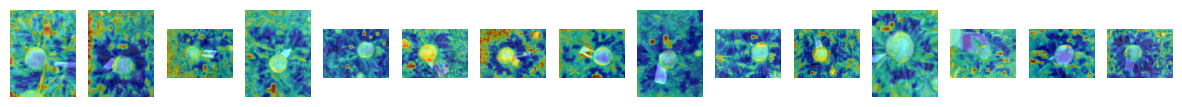

In [3]:
from YOLOv8_Explainer import yolov8_heatmap, display_images

model = yolov8_heatmap(
    weight="/content/yolo11n.pt",
        conf_threshold=0.4,
        #device = "cpu",
        method = "EigenCAM",
        layer=[10, 12, 14, 16, 18, -3],
        #backward_type="all",
        ratio=0.02,
        show_box=False,
        renormalize=False,
)

imagelist = model(
    img_path="/content/original",
    )

display_images(imagelist)

In [8]:
imagelist[0].save("/content/heatmap.jpg")